# GLM - R

## GLM for Normal Distribution Data

* **Distribution:** Normal
* **Link:** identity
* **Typical Uses:** Linear Regression: equivalent to linear (mixed) model (`lm` / `lmm`)
* **Reporting:** "Figure 12a shows an interaction plot with ±1 standard deviation error bars for X1 and X2. An analysis of variance based on linear regression indicated a statistically significant effect on Y of X1 (F(1, 56) = 7.06, p < .05), but not of X2 (F(1, 56) = 1.02, n.s.). Also, the X1×X2 interaction was not statistically significant (F(1, 56) = 2.74, n.s.)."

In [1]:
# Example data
# df has subjects (S), two between-Ss factors (X1,X2) each w/levels (a,b), and continuous response (Y)
df <- read.csv("data/2F2LBs_normal.csv")
head(df, 20)

,S,X1,X2,Y
,<int>,<chr>,<chr>,<dbl>
1,1,a,a,9.587838
2,2,a,b,9.217284
3,3,b,a,10.663489
4,4,b,b,14.932123
5,5,a,a,5.157908
6,6,a,b,11.025094
7,7,b,a,10.741292
8,8,b,b,3.169121
9,9,a,a,10.863238


In [2]:
library(car) # for Anova
df$S = factor(df$S)
df$X1 = factor(df$X1)
df$X2 = factor(df$X2)
contrasts(df$X1) <- "contr.sum"
contrasts(df$X2) <- "contr.sum"
m = glm(Y ~ X1*X2, data=df, family=gaussian)
Anova(m, type=3, test.statistic="F")

Loading required package: carData



,Sum Sq,Df,F values,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
X1,61.014582,1,7.061331,0.01024486
X2,8.787594,1,1.017005,0.31756830
X1:X2,23.639063,1,2.735793,0.10371815
Residuals,483.877154,56,NA,NA


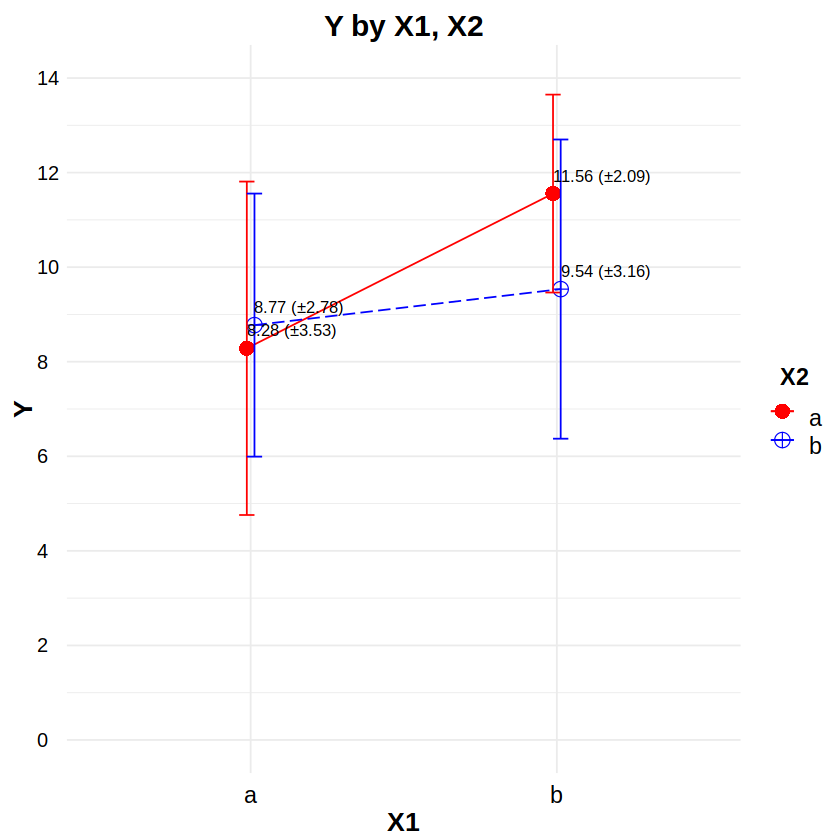

In [3]:
library(ggplot2)
library(ggthemes)
library(scales)
library(plyr)

# Interaction plot
# http://www.sthda.com/english/wiki/ggplot2-line-plot-quick-start-guide-r-software-and-data-visualization
# http://www.sthda.com/english/wiki/ggplot2-error-bars-quick-start-guide-r-software-and-data-visualization
# http://www.sthda.com/english/wiki/ggplot2-point-shapes
# http://www.sthda.com/english/wiki/ggplot2-line-types-how-to-change-line-types-of-a-graph-in-r-software
df2 <- ddply(df, ~ X1*X2, function(d) # make a summary data table
  c(NROW(d$Y),
    sum(is.na(d$Y)),
    sum(!is.na(d$Y)),
    mean(d$Y, na.rm=TRUE),
    sd(d$Y, na.rm=TRUE),
    median(d$Y, na.rm=TRUE),
    IQR(d$Y, na.rm=TRUE)))
colnames(df2) <- c("X1","X2","Rows","NAs","NotNAs","Mean","SD","Median","IQR")
ggplot(data=df2, aes(x=X1, y=Mean, color=X2, group=X2)) + theme_minimal() + 
  # set the font styles for the plot title and axis titles
  theme(plot.title   = element_text(face="bold",  color="black", size=18, hjust=0.5, vjust=0.0, angle=0)) + 
  theme(axis.title.x = element_text(face="bold",  color="black", size=16, hjust=0.5, vjust=0.0, angle=0)) + 
  theme(axis.title.y = element_text(face="bold",  color="black", size=16, hjust=0.5, vjust=0.0, angle=90)) + 
  # set the font styles for the value labels that show on each axis
  theme(axis.text.x  = element_text(face="plain", color="black", size=14, hjust=0.5, vjust=0.0, angle=0)) + 
  theme(axis.text.y  = element_text(face="plain", color="black", size=12, hjust=0.0, vjust=0.5, angle=0)) + 
  # set the font styles for the legend
  theme(legend.title = element_text(face="bold", color="black", size=14, hjust=0.5, vjust=0.0, angle=0)) +
  theme(legend.text  = element_text(face="plain", color="black", size=14, hjust=0.5, vjust=0.0, angle=0)) +
  # create the plot lines, points, and error bars
  geom_line(aes(linetype=X2), position=position_dodge(0.05)) + 
  geom_point(aes(shape=X2, size=X2), position=position_dodge(0.05)) + 
  geom_errorbar(aes(ymin=Mean-SD, ymax=Mean+SD), position=position_dodge(0.05), width=0.1) + 
  # place text labels on each bar
  geom_text(aes(label=sprintf("%.2f (±%.2f)", Mean, SD)), position=position_dodge(0.05), hjust=0.0, vjust=-1.0, color="black", size=3.5) +
  # set the labels for the title and each axis
  labs(title="Y by X1, X2", x="X1", y="Y") + 
  # set the ranges and value labels for each axis
  scale_x_discrete(labels=c("a","b")) + 
  scale_y_continuous(breaks=seq(0,14,by=2), labels=seq(0,14,by=2), limits=c(0,14), oob=rescale_none) + 
  # set the name, labels, and colors for the traces
  scale_color_manual(name="X2", labels=c("a","b"), values=c("red", "blue")) +
  # set the size and shape of the points
  scale_size_manual(values=c(4,4)) +
  scale_shape_manual(values=c(16,10)) +
  # set the linetype of the lines
  scale_linetype_manual(values=c("solid", "longdash"))

## GLM for Binomial Distribution Data

* **Distribution:** Binomial
* **Link:** logit
* **Typical Uses:** Logistic Regression: Dichotomous responses (i.e. nominal responses with two categories)
* **Reporting:** "Figure 13a shows the number of ‘x’ and ‘y’ outcomes for each level of X1 and X2. An analysis of variance based on logistic regression indicated a statistically significant effect on Y of X1 (χ2(1, N=60) = 6.05, p < .05) and of the X1×X2 interaction (χ2(1, N=60) = 8.63, p < .01), but not of X2 (χ2(1, N=60) = 2.27, n.s.)"

In [4]:
# Example data
# df has subjects (S), two factors (X1,X2) each w/levels (a,b), and dichotomous response (Y)
df <- read.csv("data/2F2LBs_binomial.csv")
head(df, 20)

,S,X1,X2,Y
,<int>,<chr>,<chr>,<chr>
1,1,a,a,x
2,2,a,b,y
3,3,b,a,y
4,4,b,b,y
5,5,a,a,x
6,6,a,b,y
7,7,b,a,y
8,8,b,b,x
9,9,a,a,x


In [5]:
library(car) # for Anova
df$S = factor(df$S)
df$X1 = factor(df$X1)
df$X2 = factor(df$X2)
df$Y = factor(df$Y) # nominal response
contrasts(df$X1) <- "contr.sum"
contrasts(df$X2) <- "contr.sum"
m = glm(Y ~ X1*X2, data=df, family=binomial)
Anova(m, type=3)

,LR Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>
X1,6.045796,1,0.013939447
X2,2.268063,1,0.132064859
X1:X2,8.631018,1,0.003304868


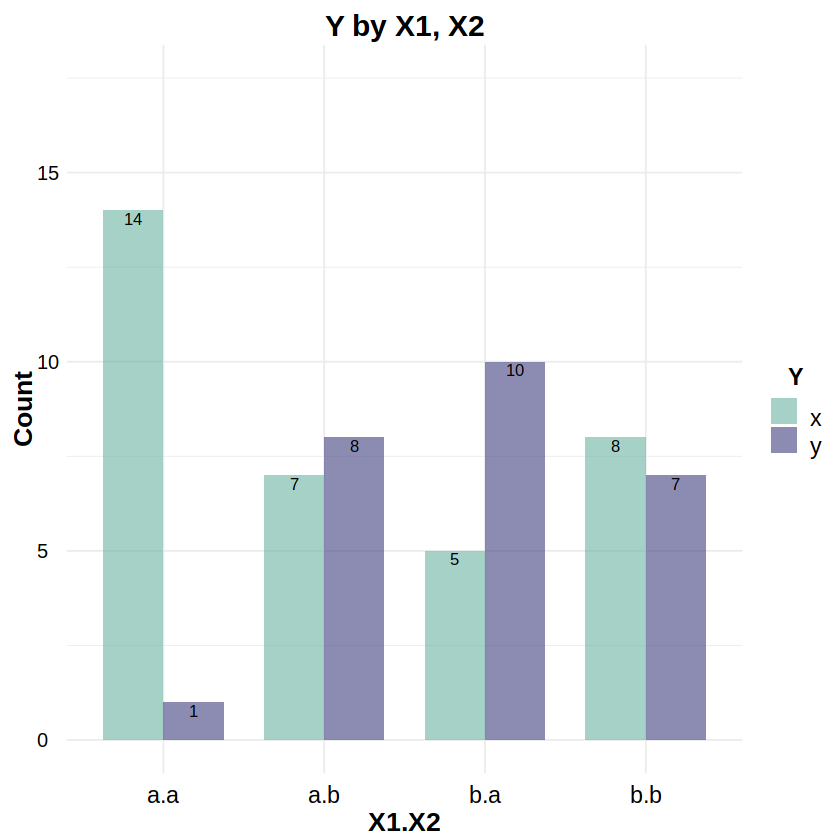

In [6]:
library(ggplot2)
library(ggthemes)
library(scales)
library(plyr)

# Barplot
# http://www.sthda.com/english/wiki/ggplot2-barplots-quick-start-guide-r-software-and-data-visualization
# https://stackoverflow.com/questions/51892875/how-to-increase-the-space-between-grouped-bars-in-ggplot2
df2 <- as.data.frame(xtabs(~ X1+X2+Y, data=df))
df2$X12 = with(df2, interaction(X1, X2))
df2$X12 = factor(df2$X12, levels=c("a.a","a.b","b.a","b.b"))
df2 <- df2[order(df2$X1, df2$X2),] # sort df2 alphabetically by X1, X2
ggplot(data=df2, aes(y=Freq, x=X12, fill=Y)) + theme_minimal() + 
  # set the font styles for the plot title and axis titles
  theme(plot.title   = element_text(face="bold",  color="black", size=18, hjust=0.5, vjust=0.0, angle=0)) + 
  theme(axis.title.x = element_text(face="bold",  color="black", size=16, hjust=0.5, vjust=0.0, angle=0)) + 
  theme(axis.title.y = element_text(face="bold",  color="black", size=16, hjust=0.5, vjust=0.0, angle=90)) + 
  # set the font styles for the value labels that show on each axis
  theme(axis.text.x  = element_text(face="plain", color="black", size=14, hjust=0.5, vjust=0.0, angle=0)) + 
  theme(axis.text.y  = element_text(face="plain", color="black", size=12, hjust=0.0, vjust=0.5, angle=0)) + 
  # set the font styles for the legend
  theme(legend.title = element_text(face="bold", color="black", size=14, hjust=0.5, vjust=0.0, angle=0)) +
  theme(legend.text  = element_text(face="plain", color="black", size=14, hjust=0.5, vjust=0.0, angle=0)) +
  # create the barplots side-by-side
  geom_col(width=0.75, position=position_dodge(width=0.75), alpha=0.60) +
  # place text labels on each bar
  geom_text(aes(label=Freq), position=position_dodge(width=0.75), vjust=1.2, color="black", size=3.5) +
  # set the labels for the title and each axis
  labs(title="Y by X1, X2", x="X1.X2", y="Count") + 
  # change the order of the bars on the x-axis
  scale_x_discrete(limits=c("a.a","a.b","b.a","b.b")) + 
  # set the scale, breaks, and labels on the y-axis
  scale_y_continuous(breaks=seq(0,17.5,by=5), labels=seq(0,17.5,by=5), limits=c(0,17.5), oob=rescale_none) + 
  # set the name, labels, and colors for the boxes
  scale_fill_manual(name="Y", labels=c("x","y"), values=c("#69b3a2","#404080"))

## GLM for Multinomial Distribution Data

* **Distribution:** Multinomial
* **Link:** logit
* **Typical Uses:** Multinomial Logistic Regression: polytomous responses (i.e. nominal responses with more two categories)
* **Reporting:** "Figure 14a shows the number of ‘x’, ‘y’, and ‘z’ outcomes for each level of X1 and X2. An analysis of variance based on multinomial logistic regression indicated a statistically significant effect on Y of X1 (χ2(2, N=60) = 10.46, p < .01), of X2 (χ2(2, N=60) = 15.21, p < .001), and a marginal X1×X2 interaction (χ2(2, N=60) = 5.09, p = .078)."

In [7]:
# Example data
# df has subjects (S), two between-Ss factors (X1,X2) each w/levels (a,b), and polytomous response (Y)
df <- read.csv("data/2F2LBs_multinomial.csv")
head(df, 20)

,S,X1,X2,Y
,<int>,<chr>,<chr>,<chr>
1,1,a,a,x
2,2,a,b,z
3,3,b,a,x
4,4,b,b,x
5,5,a,a,x
6,6,a,b,x
7,7,b,a,x
8,8,b,b,x
9,9,a,a,y


In [8]:
library(nnet) # for multinom
library(car) # for Anova
df$S = factor(df$S)
df$X1 = factor(df$X1)
df$X2 = factor(df$X2)
df$Y = factor(df$Y) # nominal response
contrasts(df$X1) <- "contr.sum"
contrasts(df$X2) <- "contr.sum"
m = multinom(Y ~ X1*X2, data=df)
Anova(m, type=3)

# weights:  15 (8 variable)
initial  value 65.916737 
iter  10 value 41.209129
iter  20 value 41.110241
iter  30 value 41.109293
final  value 41.109253 
converged


,LR Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>
X1,10.456284,2,0.0053634826
X2,15.212104,2,0.0004974317
X1:X2,5.092234,2,0.0783854422


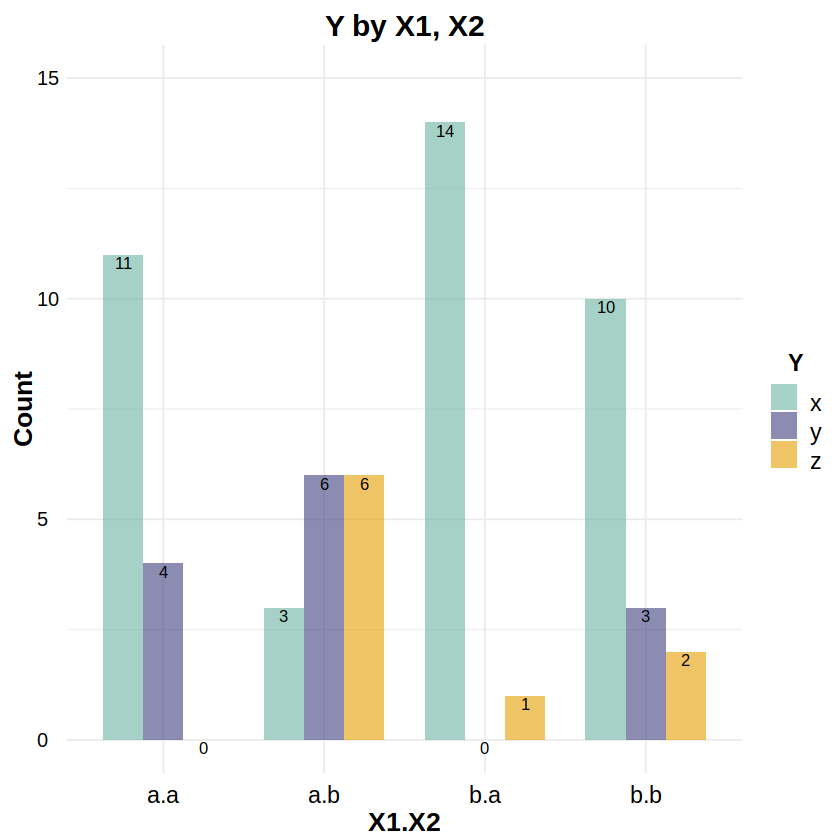

In [9]:
library(ggplot2)
library(ggthemes)
library(scales)
library(plyr)

# Barplot
# http://www.sthda.com/english/wiki/ggplot2-barplots-quick-start-guide-r-software-and-data-visualization
# https://stackoverflow.com/questions/51892875/how-to-increase-the-space-between-grouped-bars-in-ggplot2
df2 <- as.data.frame(xtabs(~ X1+X2+Y, data=df)) # build a freq table
df2$X12 = with(df2, interaction(X1, X2))
df2$X12 = factor(df2$X12, levels=c("a.a","a.b","b.a","b.b"))
df2 <- df2[order(df2$X1, df2$X2),] # sort df2 alphabetically by X1, X2
ggplot(data=df2, aes(x=X12, y=Freq, fill=Y)) + theme_minimal() + 
  # set the font styles for the plot title and axis titles
  theme(plot.title   = element_text(face="bold",  color="black", size=18, hjust=0.5, vjust=0.0, angle=0)) + 
  theme(axis.title.x = element_text(face="bold",  color="black", size=16, hjust=0.5, vjust=0.0, angle=0)) + 
  theme(axis.title.y = element_text(face="bold",  color="black", size=16, hjust=0.5, vjust=0.0, angle=90)) + 
  # set the font styles for the value labels that show on each axis
  theme(axis.text.x  = element_text(face="plain", color="black", size=14, hjust=0.5, vjust=0.0, angle=0)) + 
  theme(axis.text.y  = element_text(face="plain", color="black", size=12, hjust=0.0, vjust=0.5, angle=0)) + 
  # set the font styles for the legend
  theme(legend.title = element_text(face="bold", color="black", size=14, hjust=0.5, vjust=0.0, angle=0)) +
  theme(legend.text  = element_text(face="plain", color="black", size=14, hjust=0.5, vjust=0.0, angle=0)) +
  # create the barplots side-by-side
  geom_col(width=0.75, position=position_dodge(width=0.75), alpha=0.60) +
  # place text labels on each bar
  geom_text(aes(label=Freq), position=position_dodge(width=0.75), vjust=1.2, color="black", size=3.5) +
  # set the labels for the title and each axis
  labs(title="Y by X1, X2", x="X1.X2", y="Count") + 
  # change the order of the bars on the x-axis
  scale_x_discrete(limits=c("a.a","a.b","b.a","b.b")) + 
  # set the scale, breaks, and labels on the y-axis
  scale_y_continuous(breaks=seq(0,15,by=5), labels=seq(0,15,by=5), limits=c(0,15), oob=rescale_none) + 
  # set the name, labels, and colors for the boxes
  scale_fill_manual(name="Y", labels=c("x","y","z"), values=c("#69b3a2","#404080","#e69f00"))

## GLM for Ordinal Distribution Data

* **Distribution:** Ordinal
* **Link:** cumulative logit
* **Typical Uses:** Ordinal Logistic Regression: ordinal responses (i.e. Likert scales)
* **Reporting:** "Figure 15a shows the distribution of Likert responses (1-7) for each combination of X1 and X2. An analysis of variance based on ordinal logistic regression indicated a statistically significant effect on Y of X2 (χ2(1, N=60) = 6.14, p < .05), but not of X1 (χ2(1, N=60) = 1.65, n.s.) or of the X1×X2 interaction (χ2(1, N=60) = 0.05, n.s.)."

In [10]:
# Example data
# df has subjects (S), two between-Ss factors (X1,X2) each w/levels (a,b), and polytomous response (Y)
df <- read.csv("data/2F2LBs_ordinal.csv")
head(df, 20)

,S,X1,X2,Y
,<int>,<chr>,<chr>,<int>
1,1,a,a,7
2,2,a,b,3
3,3,b,a,3
4,4,b,b,2
5,5,a,a,5
6,6,a,b,4
7,7,b,a,3
8,8,b,b,6
9,9,a,a,4


In [11]:
library(MASS) # for polr
library(car) # for Anova
df$S = factor(df$S)
df$X1 = factor(df$X1)
df$X2 = factor(df$X2)
df$Y = ordered(df$Y) # ordinal response
contrasts(df$X1) <- "contr.sum"
contrasts(df$X2) <- "contr.sum"
m = polr(Y ~ X1*X2, data=df, Hess=TRUE)
Anova(m, type=3)

,LR Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>
X1,1.65109008,1,0.19881063
X2,6.14122538,1,0.01320658
X1:X2,0.04980176,1,0.82340859


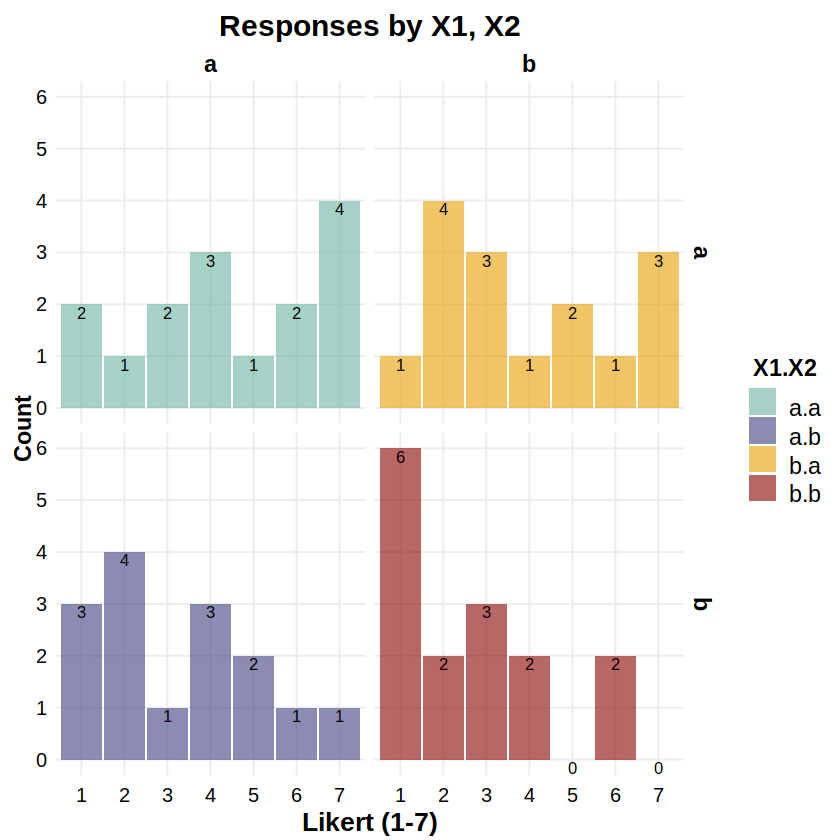

In [12]:
library(ggplot2)
library(ggthemes)
library(scales)
library(plyr)

# Ordinal histograms-as-barplots
# http://www.sthda.com/english/wiki/ggplot2-barplots-quick-start-guide-r-software-and-data-visualization
# https://stackoverflow.com/questions/51892875/how-to-increase-the-space-between-grouped-bars-in-ggplot2
df2 <- as.data.frame(xtabs(~ X1+X2+Y, data=df)) # build a freq table
df2$X12 = with(df2, interaction(X1, X2))
df2$X12 = factor(df2$X12, levels=c("a.a","a.b","b.a","b.b"))
df2 <- df2[order(df2$X1, df2$X2),] # sort df2 alphabetically by X1, X2
ggplot(data=df2, aes(x=Y, y=Freq, fill=X12)) + theme_minimal() + 
  # set the font styles for the plot title and axis titles
  theme(plot.title   = element_text(face="bold",  color="black", size=18, hjust=0.5, vjust=0.0, angle=0)) + 
  theme(axis.title.x = element_text(face="bold",  color="black", size=16, hjust=0.5, vjust=0.0, angle=0)) + 
  theme(axis.title.y = element_text(face="bold",  color="black", size=14, hjust=0.5, vjust=0.0, angle=90)) + 
  # set the font styles for the value labels that show on each axis
  theme(axis.text.x  = element_text(face="plain", color="black", size=12, hjust=0.5, vjust=0.0, angle=0)) + 
  theme(axis.text.y  = element_text(face="plain", color="black", size=12, hjust=0.0, vjust=0.5, angle=0)) + 
  # set the font styles for the legend
  theme(legend.title = element_text(face="bold", color="black", size=14, hjust=0.5, vjust=0.0, angle=0)) +
  theme(legend.text  = element_text(face="plain", color="black", size=14, hjust=0.5, vjust=0.0, angle=0)) +
  # set the font style for the facet labels
  theme(strip.text = element_text(face="bold", color="black", size=14, hjust=0.5)) + 
  # use a bar plot to just plot the value for each 1-7 in (X1,X2)
  geom_col(width=0.95, alpha=0.60) + 
  #geom_bar(stat="identity", width=0.95, alpha=0.60) + # equivalent
  # place text labels on each bar
  geom_text(aes(label=Freq), vjust=1.2, color="black", size=3.5) +
  # create a grid of plots by (X1,X2), one for each histogram
  #facet_grid(X12 ~ .) +  # 4x1 stack
  #facet_grid(. ~ X12) +  # 1x4 row
  facet_grid(X2 ~ X1) +   # 2x2 grid
  # determine the fill color values of each histogram
  scale_fill_manual(values=c("#69b3a2","#404080", "#e69f00", "darkred")) + 
  # set the labels for the title, each axis, and the legend
  labs(title="Responses by X1, X2", x="Likert (1-7)", y="Count") + 
  guides(fill=guide_legend(title="X1.X2")) + 
  # set the ranges and value labels for each axis
  scale_x_discrete(labels=seq(1,7,by=1)) +
  scale_y_continuous(breaks=seq(0,6,by=1), minor_breaks=seq(0,6,by=1), labels=seq(0,6,by=1), limits=c(0,6))

## GLM for Poisson Distribution Data

* **Distribution:** Poisson
* **Link:** log
* **Typical Uses:** Poisson Regression: counts, rare events (e.g. gesture recognition errors, 3-pointers per quarter, number of "F" grades)
* **Reporting:** "Figure 16a shows an interaction plot with ±1 standard deviation error bars for X1 and X2. An analysis of variance based on Poisson regression indicated a statistically significant effect on Y of the X1×X2 interaction (χ2(1, N=60) = 3.84, p < .05), but not of either X1 (χ2(1, N=60) = 0.17, n.s.) or X2 (χ2(1, N=60) = 1.19, n.s.)."

In [13]:
# Example data
# df has subjects (S), two factors (X1,X2) each w/levels (a,b), and count response (Y)
df <- read.csv("data/2F2LBs_poisson.csv")
head(df, 20)

,S,X1,X2,Y
,<int>,<chr>,<chr>,<int>
1,1,a,a,5
2,2,a,b,6
3,3,b,a,7
4,4,b,b,4
5,5,a,a,4
6,6,a,b,6
7,7,b,a,6
8,8,b,b,4
9,9,a,a,4


In [14]:
library(car) # for Anova
df$S = factor(df$S)
df$X1 = factor(df$X1)
df$X2 = factor(df$X2)
contrasts(df$X1) <- "contr.sum"
contrasts(df$X2) <- "contr.sum"
m = glm(Y ~ X1*X2, data=df, family=poisson)
Anova(m, type=3)

,LR Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>
X1,0.1673829,1,0.68244826
X2,1.1865585,1,0.27602485
X1:X2,3.8423440,1,0.04997361


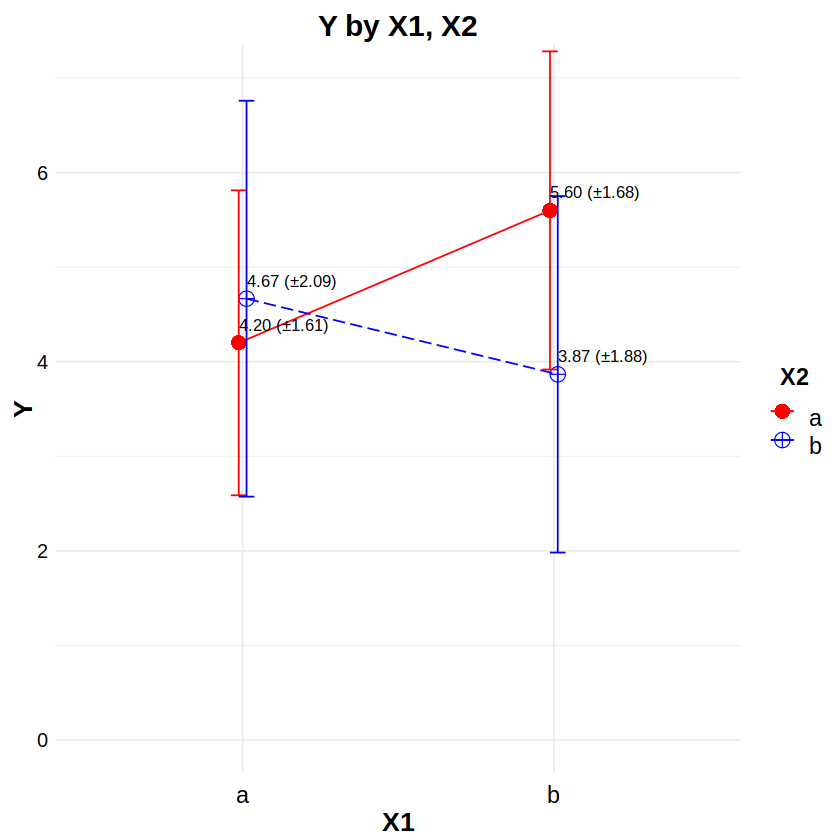

In [15]:
library(ggplot2)
library(ggthemes)
library(scales)
library(plyr)

# Interaction plot
# http://www.sthda.com/english/wiki/ggplot2-line-plot-quick-start-guide-r-software-and-data-visualization
# http://www.sthda.com/english/wiki/ggplot2-error-bars-quick-start-guide-r-software-and-data-visualization
# http://www.sthda.com/english/wiki/ggplot2-point-shapes
# http://www.sthda.com/english/wiki/ggplot2-line-types-how-to-change-line-types-of-a-graph-in-r-software
df2 <- ddply(df, ~ X1*X2, function(d) # make a summary data table
  c(NROW(d$Y),
    sum(is.na(d$Y)),
    sum(!is.na(d$Y)),
    mean(d$Y, na.rm=TRUE),
    sd(d$Y, na.rm=TRUE),
    median(d$Y, na.rm=TRUE),
    IQR(d$Y, na.rm=TRUE)))
colnames(df2) <- c("X1","X2","Rows","NAs","NotNAs","Mean","SD","Median","IQR")
ggplot(data=df2, aes(x=X1, y=Mean, color=X2, group=X2)) + theme_minimal() + 
  # set the font styles for the plot title and axis titles
  theme(plot.title   = element_text(face="bold",  color="black", size=18, hjust=0.5, vjust=0.0, angle=0)) + 
  theme(axis.title.x = element_text(face="bold",  color="black", size=16, hjust=0.5, vjust=0.0, angle=0)) + 
  theme(axis.title.y = element_text(face="bold",  color="black", size=16, hjust=0.5, vjust=0.0, angle=90)) + 
  # set the font styles for the value labels that show on each axis
  theme(axis.text.x  = element_text(face="plain", color="black", size=14, hjust=0.5, vjust=0.0, angle=0)) + 
  theme(axis.text.y  = element_text(face="plain", color="black", size=12, hjust=0.0, vjust=0.5, angle=0)) + 
  # set the font styles for the legend
  theme(legend.title = element_text(face="bold", color="black", size=14, hjust=0.5, vjust=0.0, angle=0)) +
  theme(legend.text  = element_text(face="plain", color="black", size=14, hjust=0.5, vjust=0.0, angle=0)) +
  # create the plot lines, points, and error bars
  geom_line(aes(linetype=X2), position=position_dodge(0.05)) + 
  geom_point(aes(shape=X2, size=X2), position=position_dodge(0.05)) + 
  geom_errorbar(aes(ymin=Mean-SD, ymax=Mean+SD), position=position_dodge(0.05), width=0.1) + 
  # place text labels on each bar
  geom_text(aes(label=sprintf("%.2f (±%.2f)", Mean, SD)), position=position_dodge(0.05), hjust=0.0, vjust=-1.0, color="black", size=3.5) +
  # set the labels for the title and each axis
  labs(title="Y by X1, X2", x="X1", y="Y") + 
  # set the ranges and value labels for each axis
  scale_x_discrete(labels=c("a","b")) + 
  scale_y_continuous(breaks=seq(0,7,by=2), labels=seq(0,7,by=2), limits=c(0,7), oob=rescale_none) + 
  # set the name, labels, and colors for the traces
  scale_color_manual(name="X2", labels=c("a","b"), values=c("red", "blue")) +
  # set the size and shape of the points
  scale_size_manual(values=c(4,4)) +
  scale_shape_manual(values=c(16,10)) +
  # set the linetype of the lines
  scale_linetype_manual(values=c("solid", "longdash"))

## GLM for Zero-Inflated Poisson Distribution Data

* **Distribution:** Zero-Inflated Poisson
* **Link:** log
* **Typical Uses:** Zero-Inflated Poisson Regression: counts, rare events with large proportion of zeroes
* **Reporting:** "Figure 17a shows histograms of Y by X1 and X2. An analysis of variance based on zero-inflated Poisson regression indicated a statistically significant effect on Y of the X1×X2 interaction (χ2(1, N=60) = 8.14, p < .01), and a marginal effect of X2 (χ2(1, N=60) = 3.11, p = .078). There was no statistically significant effect of X1 on Y (χ2(1, N=60) = 0.29, n.s.)."

In [16]:
# Example data
# df has subjects (S), two factors (X1,X2) each w/levels (a,b), and count response (Y)
df <- read.csv("data/2F2LBs_zipoisson.csv")
head(df, 20)

,S,X1,X2,Y
,<int>,<chr>,<chr>,<int>
1,1,a,a,1
2,2,a,b,0
3,3,b,a,0
4,4,b,b,2
5,5,a,a,1
6,6,a,b,5
7,7,b,a,6
8,8,b,b,5
9,9,a,a,1


In [17]:
library(pscl) # for zeroinfl
library(car) # for Anova
df$S = factor(df$S)
df$X1 = factor(df$X1)
df$X2 = factor(df$X2)
contrasts(df$X1) <- "contr.sum"
contrasts(df$X2) <- "contr.sum"
m = zeroinfl(Y ~ X1*X2, data=df, dist="poisson")
Anova(m, type=3)

Classes and Methods for R developed in the
Political Science Computational Laboratory
Department of Political Science
Stanford University
Simon Jackman
hurdle and zeroinfl functions by Achim Zeileis



,Df,Chisq,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>
X1,1,0.2896066,0.590472759
X2,1,3.1082852,0.077894931
X1:X2,1,8.1401659,0.004329532


Warning message:
“The dot-dot notation (`..count..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(count)` instead.”


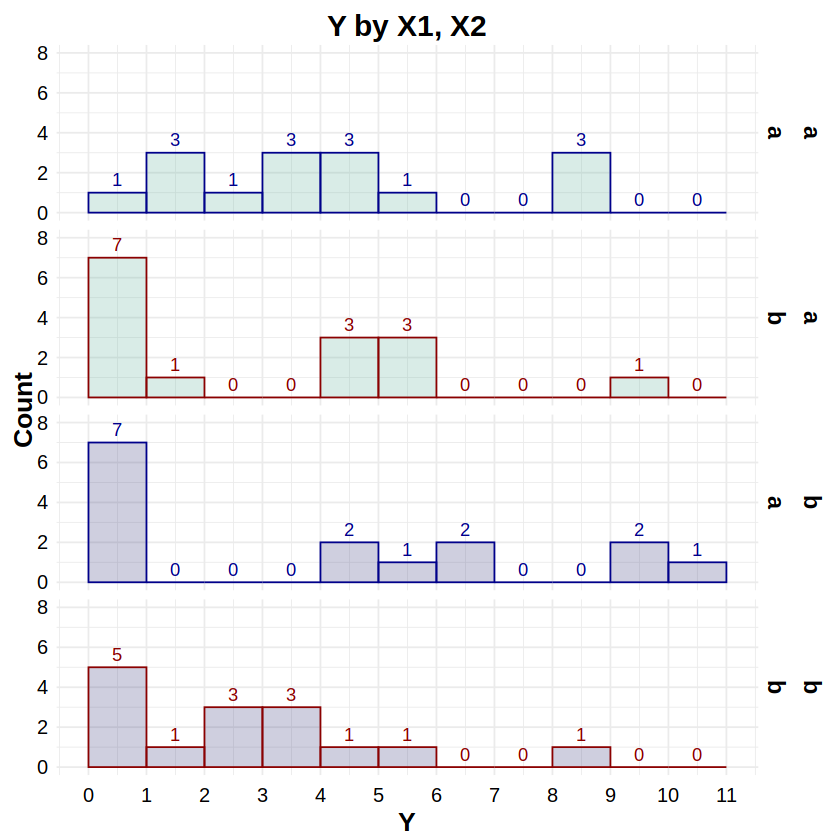

In [18]:
library(ggplot2)
library(ggthemes)
library(scales)
library(plyr)

# Histograms
# http://www.sthda.com/english/wiki/ggplot2-histogram-plot-quick-start-guide-r-software-and-data-visualization
ggplot(data=df, aes(x=Y, fill=X1, color=X2)) + theme_minimal() + 
  # set the font styles for the plot title and axis titles
  theme(plot.title   = element_text(face="bold",  color="black", size=18, hjust=0.5, vjust=0.0, angle=0)) + 
  theme(axis.title.x = element_text(face="bold",  color="black", size=16, hjust=0.5, vjust=0.0, angle=0)) + 
  theme(axis.title.y = element_text(face="bold",  color="black", size=16, hjust=0.5, vjust=0.0, angle=90)) + 
  # set the font styles for the value labels that show on each axis
  theme(axis.text.x  = element_text(face="plain", color="black", size=12, hjust=0.5, vjust=0.0, angle=0)) + 
  theme(axis.text.y  = element_text(face="plain", color="black", size=12, hjust=0.0, vjust=0.5, angle=0)) + 
  # set the font style for the facet labels
  theme(strip.text = element_text(face="bold", color="black", size=14, hjust=0.5)) + 
  # remove the legend
  theme(legend.position="none") + 
  # create the histogram; the alpha value ensures overlaps can be seen
  geom_histogram(binwidth=1, breaks=seq(-0.5,10.5,by=1), alpha=0.25) + 
  stat_bin(aes(y=..count.., label=..count..), binwidth=1, geom="text", vjust=-0.5) + 
  # create stacked plots by X, one for each histogram
  facet_grid(X1+X2 ~ .) + 
  # determine the outline and fill color values of each histogram
  scale_color_manual(values=c("darkblue","darkred")) + 
  scale_fill_manual(values=c("#69b3a2","#404080")) + 
  # set the labels for the title and each axis
  labs(title="Y by X1, X2", x="Y", y="Count") + 
  # set the ranges and value labels for each axis
  scale_x_continuous(breaks=seq(-0.5,10.5,by=1), labels=seq(0,11,by=1), limits=c(-0.5,10.5)) +
  scale_y_continuous(breaks=seq(0,8,by=2), labels=seq(0,8,by=2), limits=c(0,8))

## GLM for Negative Binomial Distribution Data

* **Distribution:** Negative Binomial
* **Link:** log
* **Typical Uses:** Negative Binomial Regression: Same as Poisson but for use in the presence of overdispersion
* **Reporting:** "Figure 18a shows an interaction plot with ±1 standard deviation error bars for X1 and X2. An analysis of variance based on negative binomial regression indicated a statistically significant effect on Y of X1 (χ2(1, N=60) = 13.46, p < .001), but not of X2 (χ2(1, N=60) = 0.07, n.s.) or the X1×X2 interaction (χ2(1, N=60) = 0.92, n.s.)."

In [19]:
# Example data
# df has subjects (S), two factors (X1,X2) each w/levels (a,b), and count response (Y)
df <- read.csv("data/2F2LBs_negbin.csv")
head(df, 20)

,S,X1,X2,Y
,<int>,<chr>,<chr>,<int>
1,1,a,a,1
2,2,a,b,1
3,3,b,a,2
4,4,b,b,9
5,5,a,a,0
6,6,a,b,1
7,7,b,a,1
8,8,b,b,7
9,9,a,a,2


In [20]:
library(MASS) # for glm.nb
library(car) # for Anova
df$S = factor(df$S)
df$X1 = factor(df$X1)
df$X2 = factor(df$X2)
contrasts(df$X1) <- "contr.sum"
contrasts(df$X2) <- "contr.sum"
m = glm.nb(Y ~ X1*X2, data=df)
Anova(m, type=3)

,LR Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>
X1,13.4596339,1,0.0002437513
X2,0.0663977,1,0.7966558091
X1:X2,0.9247341,1,0.3362350241


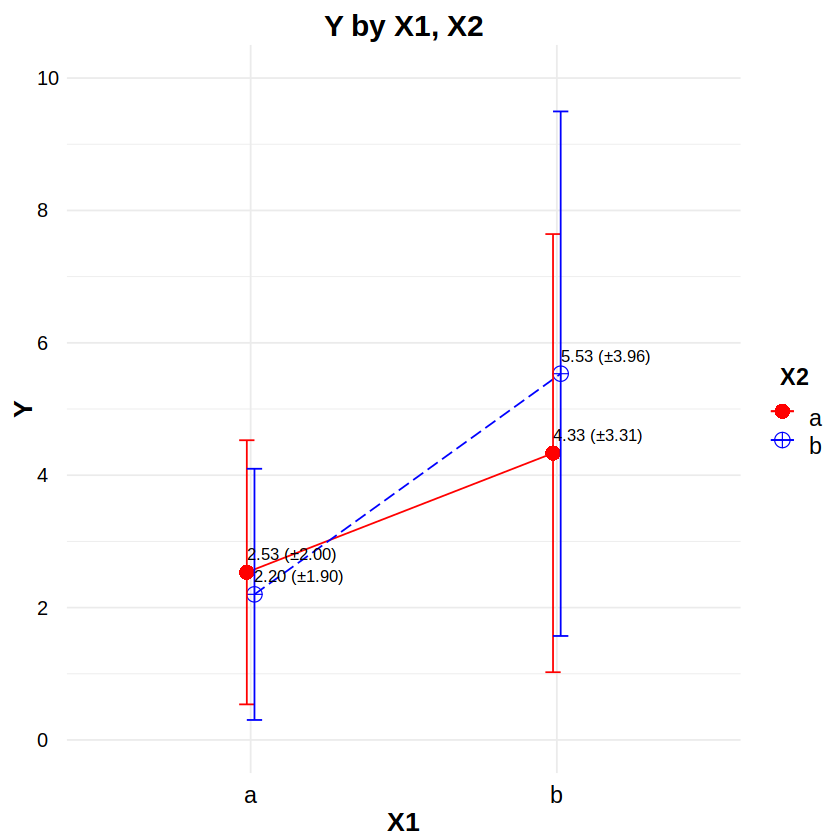

In [21]:
library(ggplot2)
library(ggthemes)
library(scales)
library(plyr)

# Interaction plot
# http://www.sthda.com/english/wiki/ggplot2-line-plot-quick-start-guide-r-software-and-data-visualization
# http://www.sthda.com/english/wiki/ggplot2-error-bars-quick-start-guide-r-software-and-data-visualization
# http://www.sthda.com/english/wiki/ggplot2-point-shapes
# http://www.sthda.com/english/wiki/ggplot2-line-types-how-to-change-line-types-of-a-graph-in-r-software
df2 <- ddply(df, ~ X1*X2, function(d) # make a summary data table
  c(NROW(d$Y),
    sum(is.na(d$Y)),
    sum(!is.na(d$Y)),
    mean(d$Y, na.rm=TRUE),
    sd(d$Y, na.rm=TRUE),
    median(d$Y, na.rm=TRUE),
    IQR(d$Y, na.rm=TRUE)))
colnames(df2) <- c("X1","X2","Rows","NAs","NotNAs","Mean","SD","Median","IQR")
ggplot(data=df2, aes(x=X1, y=Mean, color=X2, group=X2)) + theme_minimal() + 
  # set the font styles for the plot title and axis titles
  theme(plot.title   = element_text(face="bold",  color="black", size=18, hjust=0.5, vjust=0.0, angle=0)) + 
  theme(axis.title.x = element_text(face="bold",  color="black", size=16, hjust=0.5, vjust=0.0, angle=0)) + 
  theme(axis.title.y = element_text(face="bold",  color="black", size=16, hjust=0.5, vjust=0.0, angle=90)) + 
  # set the font styles for the value labels that show on each axis
  theme(axis.text.x  = element_text(face="plain", color="black", size=14, hjust=0.5, vjust=0.0, angle=0)) + 
  theme(axis.text.y  = element_text(face="plain", color="black", size=12, hjust=0.0, vjust=0.5, angle=0)) + 
  # set the font styles for the legend
  theme(legend.title = element_text(face="bold", color="black", size=14, hjust=0.5, vjust=0.0, angle=0)) +
  theme(legend.text  = element_text(face="plain", color="black", size=14, hjust=0.5, vjust=0.0, angle=0)) +
  # create the plot lines, points, and error bars
  geom_line(aes(linetype=X2), position=position_dodge(0.05)) + 
  geom_point(aes(shape=X2, size=X2), position=position_dodge(0.05)) + 
  geom_errorbar(aes(ymin=Mean-SD, ymax=Mean+SD), position=position_dodge(0.05), width=0.1) + 
  # place text labels on each bar
  geom_text(aes(label=sprintf("%.2f (±%.2f)", Mean, SD)), position=position_dodge(0.05), hjust=0.0, vjust=-1.0, color="black", size=3.5) +
  # set the labels for the title and each axis
  labs(title="Y by X1, X2", x="X1", y="Y") + 
  # set the ranges and value labels for each axis
  scale_x_discrete(labels=c("a","b")) + 
  scale_y_continuous(breaks=seq(0,10,by=2), labels=seq(0,10,by=2), limits=c(0,10), oob=rescale_none) + 
  # set the name, labels, and colors for the traces
  scale_color_manual(name="X2", labels=c("a","b"), values=c("red", "blue")) +
  # set the size and shape of the points
  scale_size_manual(values=c(4,4)) +
  scale_shape_manual(values=c(16,10)) +
  # set the linetype of the lines
  scale_linetype_manual(values=c("solid", "longdash"))

## GLM for Zero-Inflated Negative Binomial Distribution Data

* **Distribution:** Zero-Inflated Negative Binomial
* **Link:** log
* **Typical Uses:** Zero-Inflated Negative Binomial Regression: Same as Zero-Inflated Poisson but for use in the presence of overdispersion
* **Reporting:** "Figure 19a shows histograms of Y by X1 and X2. An analysis of variance based on zero-inflated negative binomial regression indicated no statistically significant effects on Y of X1 (χ2(1, N=60) = 0.43, n.s.), X2 (χ2(1, N=60) = 1.28, n.s.), or the X1×X2 interaction (χ2(1, N=60) = 0.10, n.s.)."

In [22]:
# Example data
# df has subjects (S), two between-Ss factors (X1,X2) each w/levels (a,b), and count response (Y)
df <- read.csv("data/2F2LBs_zinegbin.csv")
head(df, 20)

,S,X1,X2,Y
,<int>,<chr>,<chr>,<int>
1,1,a,a,3
2,2,a,b,1
3,3,b,a,13
4,4,b,b,0
5,5,a,a,0
6,6,a,b,1
7,7,b,a,0
8,8,b,b,2
9,9,a,a,0


In [23]:
library(pscl) # for zeroinfl
library(car) # for Anova
df$S = factor(df$S)
df$X1 = factor(df$X1)
df$X2 = factor(df$X2)
contrasts(df$X1) <- "contr.sum"
contrasts(df$X2) <- "contr.sum"
m = zeroinfl(Y ~ X1*X2, data=df, dist="negbin")
Anova(m, type=3)

,Df,Chisq,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>
X1,1,0.42588152,0.5140168
X2,1,1.28178400,0.2575676
X1:X2,1,0.09911078,0.7528994


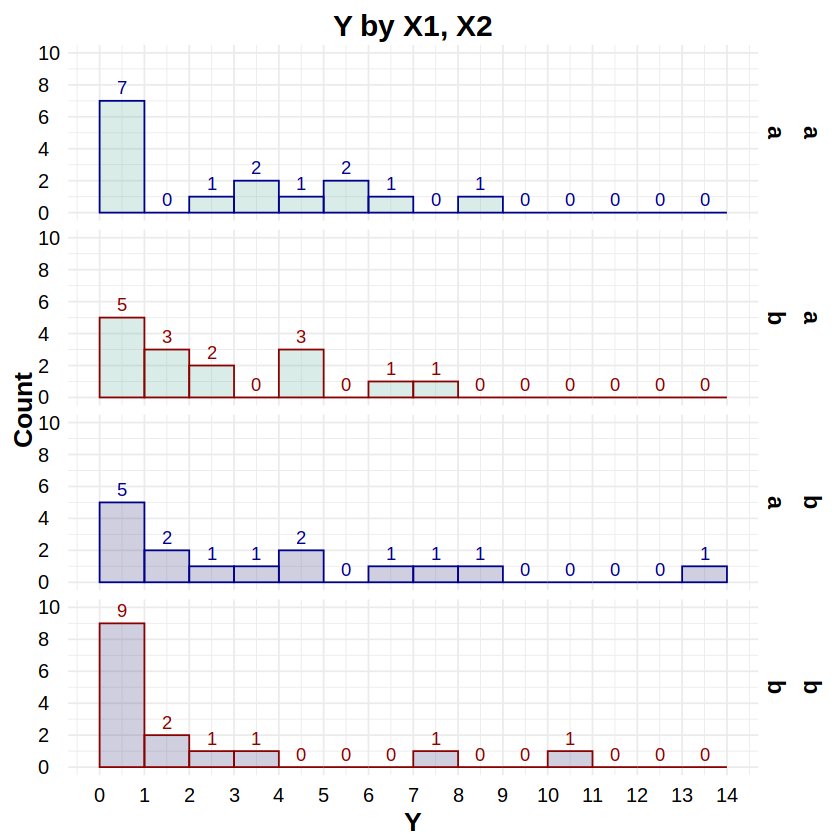

In [24]:
library(ggplot2)
library(ggthemes)
library(scales)
library(plyr)

# Histograms
# http://www.sthda.com/english/wiki/ggplot2-histogram-plot-quick-start-guide-r-software-and-data-visualization
ggplot(data=df, aes(x=Y, fill=X1, color=X2)) + theme_minimal() + 
  # set the font styles for the plot title and axis titles
  theme(plot.title   = element_text(face="bold",  color="black", size=18, hjust=0.5, vjust=0.0, angle=0)) + 
  theme(axis.title.x = element_text(face="bold",  color="black", size=16, hjust=0.5, vjust=0.0, angle=0)) + 
  theme(axis.title.y = element_text(face="bold",  color="black", size=16, hjust=0.5, vjust=0.0, angle=90)) + 
  # set the font styles for the value labels that show on each axis
  theme(axis.text.x  = element_text(face="plain", color="black", size=12, hjust=0.5, vjust=0.0, angle=0)) + 
  theme(axis.text.y  = element_text(face="plain", color="black", size=12, hjust=0.0, vjust=0.5, angle=0)) + 
  # set the font style for the facet labels
  theme(strip.text = element_text(face="bold", color="black", size=14, hjust=0.5)) + 
  # remove the legend
  theme(legend.position="none") + 
  # create the histogram; the alpha value ensures overlaps can be seen
  geom_histogram(binwidth=1, breaks=seq(-0.5,13.5,by=1), alpha=0.25) + 
  stat_bin(aes(y=..count.., label=..count..), binwidth=1, geom="text", vjust=-0.5) + 
  # create stacked plots by X, one for each histogram
  facet_grid(X1+X2 ~ .) + 
  # determine the outline and fill color values of each histogram
  scale_color_manual(values=c("darkblue","darkred")) + 
  scale_fill_manual(values=c("#69b3a2","#404080")) + 
  # set the labels for the title and each axis
  labs(title="Y by X1, X2", x="Y", y="Count") + 
  # set the ranges and value labels for each axis
  scale_x_continuous(breaks=seq(-0.5,13.5,by=1), labels=seq(0,14,by=1), limits=c(-0.5,13.5)) +
  scale_y_continuous(breaks=seq(0,10,by=2), labels=seq(0,10,by=2), limits=c(0,10))

## GLM for Gamma and Expontential Distribution Data

* **Distribution:** Gamma and Exponential
* **Link:** inverse or log when 1/0 is undefined
* **Typical Uses:** Gamma Regression: Exponentially distributed responses (e.g. income, wait times)
* **Reporting:** "Figure 20a shows an interaction plot with ±1 standard deviation error bars for X1 and X2. An analysis of variance based on Gamma regression indicated no statistically significant effect on Y of X1 (χ2(1, N=60) = 0.40, n.s.) or X2 (χ2(1, N=60) = 0.58, n.s.), but the X1×X2 interaction was marginal (χ2(1, N=60) = 3.26, p = .071)."

In [25]:
# Example data
# df has subjects (S), two factors (X1,X2) each w/levels (a,b), and continuous response (Y)
df <- read.csv("data/2F2LBs_gamma.csv")
head(df, 20)

,S,X1,X2,Y
,<int>,<chr>,<chr>,<dbl>
1,1,a,a,7.210222
2,2,a,b,4.511329
3,3,b,a,8.750533
4,4,b,b,4.636170
5,5,a,a,5.059694
6,6,a,b,3.906251
7,7,b,a,4.144064
8,8,b,b,2.890245
9,9,a,a,11.229607


In [27]:
library(car) # for Anova
df$S = factor(df$S)
df$X1 = factor(df$X1)
df$X2 = factor(df$X2)
contrasts(df$X1) <- "contr.sum"
contrasts(df$X2) <- "contr.sum"
m = glm(Y ~ X1*X2, data=df, family=Gamma)
# family=Gamma(link="log") is often used
Anova(m, type=3)

,LR Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>
X1,0.3971864,1,0.52854588
X2,0.5791674,1,0.44663887
X1:X2,3.2574933,1,0.07109773


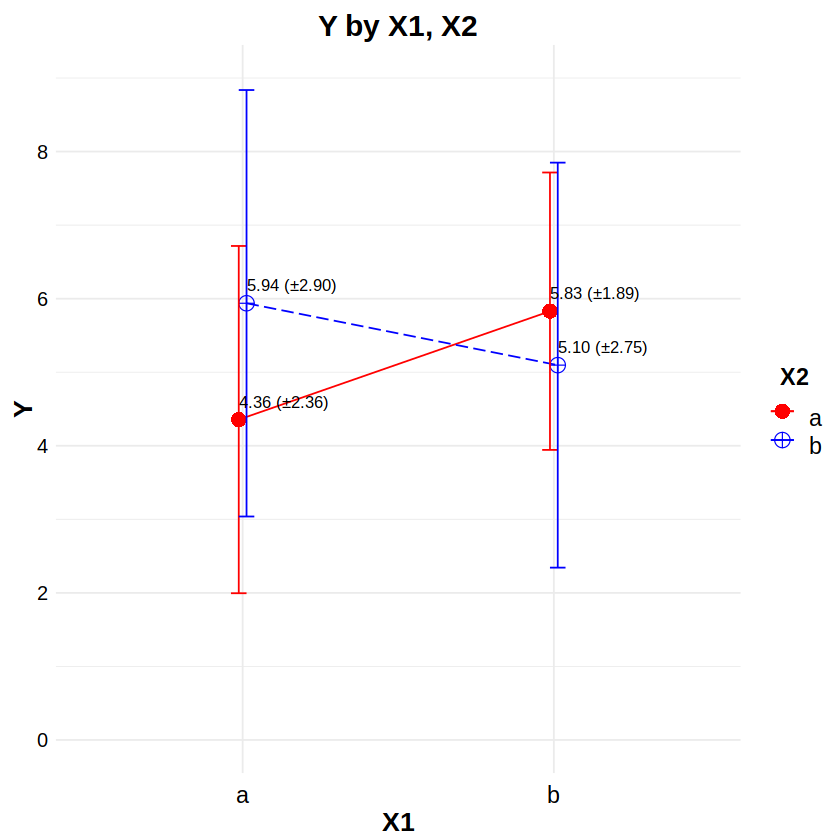

In [28]:
library(ggplot2)
library(ggthemes)
library(scales)
library(plyr)

# Interaction plot
# http://www.sthda.com/english/wiki/ggplot2-line-plot-quick-start-guide-r-software-and-data-visualization
# http://www.sthda.com/english/wiki/ggplot2-error-bars-quick-start-guide-r-software-and-data-visualization
# http://www.sthda.com/english/wiki/ggplot2-point-shapes
# http://www.sthda.com/english/wiki/ggplot2-line-types-how-to-change-line-types-of-a-graph-in-r-software
df2 <- ddply(df, ~ X1*X2, function(d) # make a summary data table
  c(NROW(d$Y),
    sum(is.na(d$Y)),
    sum(!is.na(d$Y)),
    mean(d$Y, na.rm=TRUE),
    sd(d$Y, na.rm=TRUE),
    median(d$Y, na.rm=TRUE),
    IQR(d$Y, na.rm=TRUE)))
colnames(df2) <- c("X1","X2","Rows","NAs","NotNAs","Mean","SD","Median","IQR")
ggplot(data=df2, aes(x=X1, y=Mean, color=X2, group=X2)) + theme_minimal() + 
  # set the font styles for the plot title and axis titles
  theme(plot.title   = element_text(face="bold",  color="black", size=18, hjust=0.5, vjust=0.0, angle=0)) + 
  theme(axis.title.x = element_text(face="bold",  color="black", size=16, hjust=0.5, vjust=0.0, angle=0)) + 
  theme(axis.title.y = element_text(face="bold",  color="black", size=16, hjust=0.5, vjust=0.0, angle=90)) + 
  # set the font styles for the value labels that show on each axis
  theme(axis.text.x  = element_text(face="plain", color="black", size=14, hjust=0.5, vjust=0.0, angle=0)) + 
  theme(axis.text.y  = element_text(face="plain", color="black", size=12, hjust=0.0, vjust=0.5, angle=0)) + 
  # set the font styles for the legend
  theme(legend.title = element_text(face="bold", color="black", size=14, hjust=0.5, vjust=0.0, angle=0)) +
  theme(legend.text  = element_text(face="plain", color="black", size=14, hjust=0.5, vjust=0.0, angle=0)) +
  # create the plot lines, points, and error bars
  geom_line(aes(linetype=X2), position=position_dodge(0.05)) + 
  geom_point(aes(shape=X2, size=X2), position=position_dodge(0.05)) + 
  geom_errorbar(aes(ymin=Mean-SD, ymax=Mean+SD), position=position_dodge(0.05), width=0.1) + 
  # place text labels on each bar
  geom_text(aes(label=sprintf("%.2f (±%.2f)", Mean, SD)), position=position_dodge(0.05), hjust=0.0, vjust=-1.0, color="black", size=3.5) +
  # set the labels for the title and each axis
  labs(title="Y by X1, X2", x="X1", y="Y") + 
  # set the ranges and value labels for each axis
  scale_x_discrete(labels=c("a","b")) + 
  scale_y_continuous(breaks=seq(0,9,by=2), labels=seq(0,9,by=2), limits=c(0,9), oob=rescale_none) + 
  # set the name, labels, and colors for the traces
  scale_color_manual(name="X2", labels=c("a","b"), values=c("red", "blue")) +
  # set the size and shape of the points
  scale_size_manual(values=c(4,4)) +
  scale_shape_manual(values=c(16,10)) +
  # set the linetype of the lines
  scale_linetype_manual(values=c("solid", "longdash"))